In [1]:
# WHY DOESN'T THE INSTALL WORK????!!!!! >:O
import sys
sys.path.insert(1, '../tornado_mod')

In [2]:
import os
from importlib import reload

In [3]:
from classifier.__init__ import *
from streams.generators.__init__ import *

In [4]:
import drift_detection.__init__ as detectors
detector_names = [d for d in dir(detectors) if (not d.startswith('__')) and (d != 'BDDM')]
detectors = [ getattr(detectors, d)() for d in detector_names ]

In [5]:
from run_experiments import create_datastreams, run_trials

In [6]:
names = ['high_noise', 'low_noise', 'gradual_drift', 'abrupt_drift', 'long_concepts', 'short_concepts']

In [ ]:
benchmark_streams = [SINE1, SINE2, STAGGER, SEA, CIRCLES, MIXED, LEDConceptDrift]
benchmark_names = ['high_noise', 'low_noise', 'gradual_drift', 'abrupt_drift', 'long_concepts', 'short_concepts']
noise_rates = [0.4, 0.02, 0.1, 0.1, 0.1, 0.1]
concept_lens = [1000, 1000, 1000, 1000, 2000, 250]
transition_lens = [50, 50, 250, 0, 50, 50]

all_drift_locs = []
for name, noise, con_len, tran_len in zip(benchmark_names, noise_rates, concept_lens, transition_lens):

    drift_locs = create_datastreams(
        './benchmark_data/'+name, 
        benchmark_streams, 
        n_trials=2, 
        stream_kwargs={
            'concept_length': con_len,
            'noise_rate': noise,
            'transition_length': tran_len
        }
    )
    
    all_drift_locs.append(drift_locs)

In [8]:
all_drift_locs = [{'SINE1': [1000, 2000, 3000, 4000],
  'SINE2': [1000, 2000, 3000, 4000],
  'STAGGER': [1000, 2000],
  'SEA': [1000, 2000, 3000],
  'CIRCLES': [1000, 2000, 3000],
  'MIXED': [1000, 2000, 3000, 4000],
  'LEDConceptDrift': [1000, 2000, 3000]},
 {'SINE1': [1000, 2000, 3000, 4000],
  'SINE2': [1000, 2000, 3000, 4000],
  'STAGGER': [1000, 2000],
  'SEA': [1000, 2000, 3000],
  'CIRCLES': [1000, 2000, 3000],
  'MIXED': [1000, 2000, 3000, 4000],
  'LEDConceptDrift': [1000, 2000, 3000]},
 {'SINE1': [1000, 2000, 3000, 4000],
  'SINE2': [1000, 2000, 3000, 4000],
  'STAGGER': [1000, 2000],
  'SEA': [1000, 2000, 3000],
  'CIRCLES': [1000, 2000, 3000],
  'MIXED': [1000, 2000, 3000, 4000],
  'LEDConceptDrift': [1000, 2000, 3000]},
 {'SINE1': [1000, 2000, 3000, 4000],
  'SINE2': [1000, 2000, 3000, 4000],
  'STAGGER': [1000, 2000],
  'SEA': [1000, 2000, 3000],
  'CIRCLES': [1000, 2000, 3000],
  'MIXED': [1000, 2000, 3000, 4000],
  'LEDConceptDrift': [1000, 2000, 3000]},
 {'SINE1': [2000, 4000, 6000, 8000],
  'SINE2': [2000, 4000, 6000, 8000],
  'STAGGER': [2000, 4000],
  'SEA': [2000, 4000, 6000],
  'CIRCLES': [2000, 4000, 6000],
  'MIXED': [2000, 4000, 6000, 8000],
  'LEDConceptDrift': [2000, 4000, 6000]},
 {'SINE1': [250, 500, 750, 1000],
  'SINE2': [250, 500, 750, 1000],
  'STAGGER': [250, 500],
  'SEA': [250, 500, 750],
  'CIRCLES': [250, 500, 750],
  'MIXED': [250, 500, 750, 1000],
  'LEDConceptDrift': [250, 500, 750]}]

benchmark_streams = [SINE1, SINE2, STAGGER, SEA, CIRCLES, MIXED, LEDConceptDrift]
benchmark_names = ['high_noise', 'low_noise', 'gradual_drift', 'abrupt_drift', 'long_concepts', 'short_concepts']

In [ ]:
pairs = [
    [model, thingy, detector] for detector in detectors
    for (model, thingy) in [
             [NaiveBayes, 'nominal'], 
             [Perceptron, 'numeric'], 
             [HoeffdingTree, 'nominal']
    ]
]

for name, locs in zip(names, all_drift_locs):
    run_trials('benchmark_data/'+name, 
               'benchmark_results/'+name, 
               locs, 
               pairs)

# Create LaTeX Tables and CD Diagrams

In [1]:
from parse_results import *
import os

In [2]:
category = 'benchmark'

In [3]:
results = parse_results(f'{category}_results')
results.head()

,Detector,Model,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay,d0,d1,d2,d3
1,ADWIN,NAIVE BAYES,2.0,1.0,17.0,34.98,160.85,86.75,484.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
2,ADWIN,PERCEPTRON,0.0,3.0,19.0,63.95,76.99,62.42,750.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
3,ADWIN,HOEFFDING TREE,1.0,2.0,24.0,40.97,166.34,124.67,589.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
4,BWAF,NAIVE BAYES,3.0,0.0,0.0,21.19,157.56,420.58,58.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
5,BWAF,PERCEPTRON,3.0,0.0,0.0,36.94,72.10,306.38,103.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801


In [4]:
results = extend_metrics(results)
results.drop(columns=['d3', 'Total Delay', 'TP', 'FN', 'FP'], inplace=True)
results.rename(columns={
    'd0': 'Mode', 
    'd1': 'Datastream', 
    'd2': 'dataset_name'
}, inplace=True)
results['dataset_name'] = results['dataset_name'] + results['Model'] + results['Mode']
# a better order
results = results[[
    'Detector', 'Model', 'Mode', 'dataset_name', # admin
    'Precision', 'Recall', # main accuracy metrics
    'F1', 'Mean Delay', # secondary accuracy metrics
    'Memory', 'Runtime' # performance metrics
]]
results.head()

,Detector,Model,Mode,dataset_name,Precision,Recall,F1,Mean Delay,Memory,Runtime
1,ADWIN,NAIVE BAYES,long_concepts,LEDConceptDrift_1NAIVE BAYESlong_concepts,0.142857,0.6,0.230769,161.333333,160.85,86.75
2,ADWIN,PERCEPTRON,long_concepts,LEDConceptDrift_1PERCEPTRONlong_concepts,0.047619,0.2,0.076923,250.000000,76.99,62.42
3,ADWIN,HOEFFDING TREE,long_concepts,LEDConceptDrift_1HOEFFDING TREElong_concepts,0.074074,0.4,0.125000,196.333333,166.34,124.67
4,BWAF,NAIVE BAYES,long_concepts,LEDConceptDrift_1NAIVE BAYESlong_concepts,0.800000,0.8,0.800000,19.333333,157.56,420.58
5,BWAF,PERCEPTRON,long_concepts,LEDConceptDrift_1PERCEPTRONlong_concepts,0.800000,0.8,0.800000,34.333333,72.10,306.38


In [5]:
import parse_results
from importlib import reload 
parse_results = reload(parse_results)
process_results = parse_results.process_results

Writing LaTeX table to tables/benchmark.tex


/anaconda3/envs/triage_drift_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Writing cd diagrams to figures/benchmark.pdf


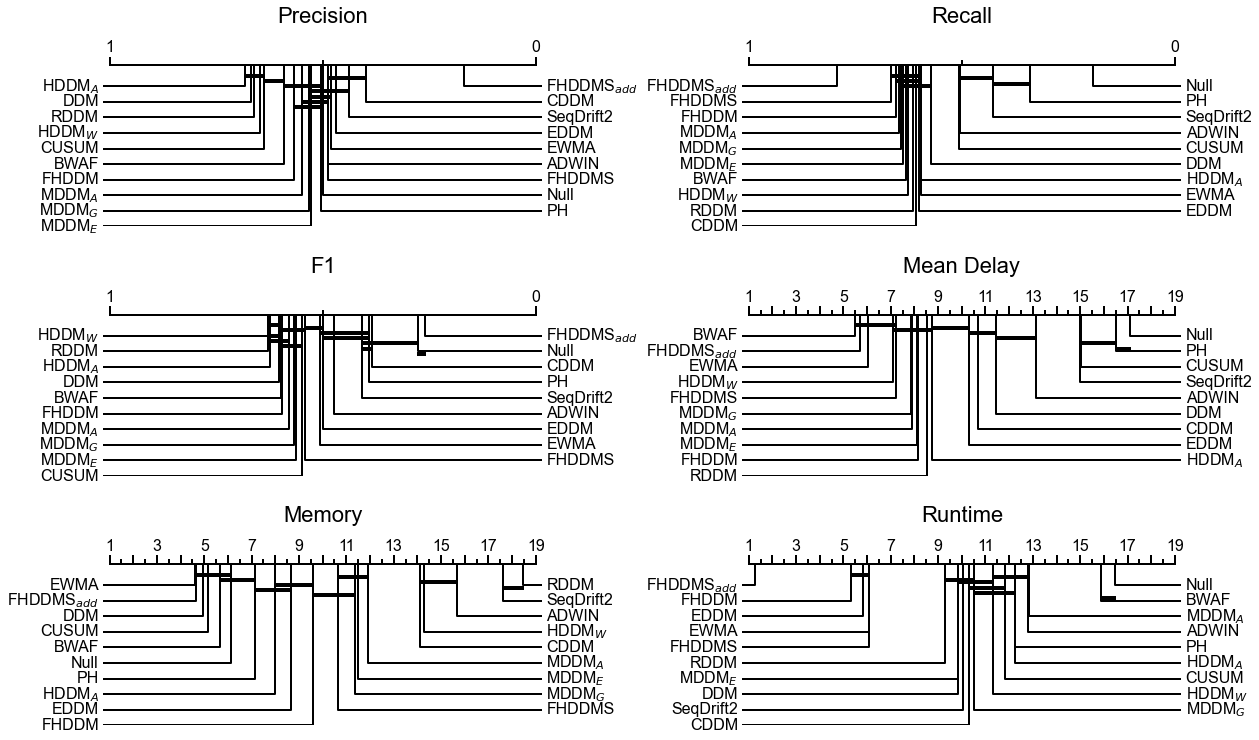

In [6]:
latex = process_results(
    results.drop( columns=['Model', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}.tex',
    fig_path=f'figures/{category}.pdf',
    bold_best=True,
    alpha=0.05
)

In [7]:
print(process_results(
    results[ results['Detector'].isin(['BDDM', 'BWAF', 'CDDM']) ]
        .drop( columns=['Model'] ), 
    groupby=['Detector', 'Mode'], 
    latex_path=f'tables/{category}_modes.tex',
#     fig_path='figures/benchmarks_modes.pdf',
    cd_diagram=False,
    bold_best=False
))

Writing LaTeX table to tables/benchmark_modes.tex
\begin{tabular}{lrrrrrrr}
\toprule
     &                &    Precision &       Recall &           F1 &       Mean Delay &           Memory (bytes) &          Runtime (ms) \\
Detector & Mode &              &              &              &                  &                  &                  \\
\midrule
BWAF & Abrupt Drift &  0.65 (0.17) &  0.72 (0.20) &  0.67 (0.18) &    54.62 (83.65) &   68.29 (140.58) &    79.75 (88.30) \\
     & Gradual Drift &  0.62 (0.16) &  0.69 (0.20) &  0.64 (0.17) &   122.58 (57.23) &    46.10 (43.07) &    77.11 (84.20) \\
     & High Noise &  0.47 (0.16) &  0.45 (0.21) &  0.44 (0.17) &   182.14 (63.33) &    42.10 (42.11) &  117.80 (124.63) \\
     & Long Concepts &  0.55 (0.17) &  0.70 (0.20) &  0.61 (0.18) &    72.20 (74.96) &    58.40 (66.98) &  138.52 (161.89) \\
     & Low Noise &  0.67 (0.17) &  0.71 (0.21) &  0.68 (0.19) &    61.26 (79.64) &    58.61 (70.37) &    78.43 (84.09) \\
     & Short Concepts &

# Redo null

In [1]:
# WHY DOESN'T THE INSTALL WORK????!!!!! >:O
import sys
sys.path.insert(1, '../tornado_mod')

In [2]:
import os
from importlib import reload

In [3]:
from classifier.__init__ import *
from streams.generators.__init__ import *

In [4]:
import drift_detection.__init__ as detectors
detector_names = [d for d in dir(detectors) if (not d.startswith('__')) and (d != 'BDDM')]
detectors = [ getattr(detectors, d)() for d in detector_names ]

In [5]:
from run_experiments import create_datastreams, run_trials

In [6]:
names = ['high_noise', 'low_noise', 'gradual_drift', 'abrupt_drift', 'long_concepts', 'short_concepts']

In [7]:
from drift_detection.no_detection import NO_DETECTION

In [8]:
all_drift_locs = [{'SINE1': [1000, 2000, 3000, 4000],
  'SINE2': [1000, 2000, 3000, 4000],
  'STAGGER': [1000, 2000],
  'SEA': [1000, 2000, 3000],
  'CIRCLES': [1000, 2000, 3000],
  'MIXED': [1000, 2000, 3000, 4000],
  'LEDConceptDrift': [1000, 2000, 3000]},
 {'SINE1': [1000, 2000, 3000, 4000],
  'SINE2': [1000, 2000, 3000, 4000],
  'STAGGER': [1000, 2000],
  'SEA': [1000, 2000, 3000],
  'CIRCLES': [1000, 2000, 3000],
  'MIXED': [1000, 2000, 3000, 4000],
  'LEDConceptDrift': [1000, 2000, 3000]},
 {'SINE1': [1000, 2000, 3000, 4000],
  'SINE2': [1000, 2000, 3000, 4000],
  'STAGGER': [1000, 2000],
  'SEA': [1000, 2000, 3000],
  'CIRCLES': [1000, 2000, 3000],
  'MIXED': [1000, 2000, 3000, 4000],
  'LEDConceptDrift': [1000, 2000, 3000]},
 {'SINE1': [1000, 2000, 3000, 4000],
  'SINE2': [1000, 2000, 3000, 4000],
  'STAGGER': [1000, 2000],
  'SEA': [1000, 2000, 3000],
  'CIRCLES': [1000, 2000, 3000],
  'MIXED': [1000, 2000, 3000, 4000],
  'LEDConceptDrift': [1000, 2000, 3000]},
 {'SINE1': [2000, 4000, 6000, 8000],
  'SINE2': [2000, 4000, 6000, 8000],
  'STAGGER': [2000, 4000],
  'SEA': [2000, 4000, 6000],
  'CIRCLES': [2000, 4000, 6000],
  'MIXED': [2000, 4000, 6000, 8000],
  'LEDConceptDrift': [2000, 4000, 6000]},
 {'SINE1': [250, 500, 750, 1000],
  'SINE2': [250, 500, 750, 1000],
  'STAGGER': [250, 500],
  'SEA': [250, 500, 750],
  'CIRCLES': [250, 500, 750],
  'MIXED': [250, 500, 750, 1000],
  'LEDConceptDrift': [250, 500, 750]}]

benchmark_streams = [SINE1, SINE2, STAGGER, SEA, CIRCLES, MIXED, LEDConceptDrift]
benchmark_names = ['high_noise', 'low_noise', 'gradual_drift', 'abrupt_drift', 'long_concepts', 'short_concepts']

In [ ]:
pairs = [
    [model, thingy, detector] for detector in [NO_DETECTION()]
    for (model, thingy) in [
             [NaiveBayes, 'nominal'], 
             [Perceptron, 'numeric'], 
             [HoeffdingTree, 'nominal']
    ]
]

for name, locs in zip(names, all_drift_locs):
    run_trials('benchmark_data/'+name, 
               'benchmark_results_null/'+name, 
               locs, 
               pairs)

In [1]:
from parse_results import *
import os

In [2]:
category = 'benchmark'

In [3]:
results = parse_results(f'{category}_results')
results.head()

,Detector,Model,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay,d0,d1,d2,d3
1,ADWIN,NAIVE BAYES,2.0,1.0,17.0,34.98,160.85,86.75,484.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
2,ADWIN,PERCEPTRON,0.0,3.0,19.0,63.95,76.99,62.42,750.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
3,ADWIN,HOEFFDING TREE,1.0,2.0,24.0,40.97,166.34,124.67,589.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
4,BWAF,NAIVE BAYES,3.0,0.0,0.0,21.19,157.56,420.58,58.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
5,BWAF,PERCEPTRON,3.0,0.0,0.0,36.94,72.10,306.38,103.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801


In [4]:
results.groupby('Detector').mean()

,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay
Detector,,,,,,,
ADWIN,1.690476,1.595238,2.404762,29.771190,59.781786,60.267222,564.313492
BWAF,2.365079,0.920635,1.325397,28.170556,52.563294,86.748889,340.277778
CDDM,2.250000,1.035714,57.285714,28.867857,78.194246,81.652500,426.126984
CUSUM,1.714286,1.571429,0.226190,27.134563,68.195992,84.613056,628.539683
DDM,2.051587,1.234127,0.242063,27.056984,61.868968,78.296071,486.972222
EDDM,2.198413,1.087302,3.738095,27.625159,60.953373,64.531627,469.234127
EWMA,2.174603,1.111111,3.007937,29.545119,47.323095,70.325833,366.623016
FHDDM,2.503968,0.781746,1.956349,28.538056,54.167421,49.373175,368.726190
FHDDMS,2.555556,0.730159,3.936508,29.175238,48.345675,44.404643,353.166667


In [22]:
null_results = parse_results('benchmark_results_null')

In [30]:
null_results.groupby('d0').mean()

,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay
d0,,,,,,,
abrupt_drift,0.0,3.285714,0.0,28.417857,84.822143,188.067619,821.428571
gradual_drift,0.0,3.285714,0.0,28.103095,69.240476,174.104048,821.428571
high_noise,0.0,3.285714,0.0,46.336905,50.800000,185.246667,821.428571
long_concepts,0.0,3.285714,0.0,26.661429,156.274048,363.624524,821.428571
low_noise,0.0,3.285714,0.0,24.066905,96.904048,187.362381,821.428571
short_concepts,0.0,3.285714,0.0,33.641190,47.150714,42.751429,821.142857


In [23]:
results = results[results['Detector']!='NO_DETECTION']
results = results.append(null_results)
results.head()

,Detector,Model,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay,d0,d1,d2,d3
1,ADWIN,NAIVE BAYES,2.0,1.0,17.0,34.98,160.85,86.75,484.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
2,ADWIN,PERCEPTRON,0.0,3.0,19.0,63.95,76.99,62.42,750.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
3,ADWIN,HOEFFDING TREE,1.0,2.0,24.0,40.97,166.34,124.67,589.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
4,BWAF,NAIVE BAYES,3.0,0.0,0.0,21.19,157.56,420.58,58.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801
5,BWAF,PERCEPTRON,3.0,0.0,0.0,36.94,72.10,306.38,103.0,long_concepts,LEDConceptDrift,LEDConceptDrift_1,20200701_064801


In [27]:
results.groupby('Detector').mean()

,Precision,Recall,F1,Mean Delay,Memory,Runtime
Detector,,,,,,
ADWIN,0.487960,0.503307,0.473902,173.564484,59.781786,60.267222
BWAF,0.591504,0.630489,0.598219,105.203704,52.563294,86.748889
CDDM,0.399364,0.606944,0.383991,132.917659,78.194246,81.652500
CUSUM,0.638426,0.506019,0.548310,194.154101,68.195992,84.613056
DDM,0.668320,0.572024,0.601328,149.428571,61.868968,78.296071
EDDM,0.468107,0.601257,0.499422,141.649140,60.953373,64.531627
EWMA,0.479460,0.596759,0.505104,112.577050,47.323095,70.325833
FHDDM,0.567640,0.655159,0.595505,114.971892,54.167421,49.373175
FHDDMS,0.488261,0.666005,0.542030,109.997685,48.345675,44.404643


In [24]:
results = extend_metrics(results)
results.drop(columns=['d3', 'Total Delay', 'TP', 'FN', 'FP'], inplace=True)
results.rename(columns={
    'd0': 'Mode', 
    'd1': 'Datastream', 
    'd2': 'dataset_name'
}, inplace=True)
results['dataset_name'] = results['dataset_name'] + results['Model'] + results['Mode']
# a better order
results = results[[
    'Detector', 'Model', 'Mode', 'dataset_name', # admin
    'Precision', 'Recall', # main accuracy metrics
    'F1', 'Mean Delay', # secondary accuracy metrics
    'Memory', 'Runtime' # performance metrics
]]
results.head()

,Detector,Model,Mode,dataset_name,Precision,Recall,F1,Mean Delay,Memory,Runtime
1,ADWIN,NAIVE BAYES,long_concepts,LEDConceptDrift_1NAIVE BAYESlong_concepts,0.142857,0.6,0.230769,161.333333,160.85,86.75
2,ADWIN,PERCEPTRON,long_concepts,LEDConceptDrift_1PERCEPTRONlong_concepts,0.047619,0.2,0.076923,250.000000,76.99,62.42
3,ADWIN,HOEFFDING TREE,long_concepts,LEDConceptDrift_1HOEFFDING TREElong_concepts,0.074074,0.4,0.125000,196.333333,166.34,124.67
4,BWAF,NAIVE BAYES,long_concepts,LEDConceptDrift_1NAIVE BAYESlong_concepts,0.800000,0.8,0.800000,19.333333,157.56,420.58
5,BWAF,PERCEPTRON,long_concepts,LEDConceptDrift_1PERCEPTRONlong_concepts,0.800000,0.8,0.800000,34.333333,72.10,306.38


In [25]:
import parse_results
from importlib import reload 
parse_results = reload(parse_results)
process_results = parse_results.process_results

Writing LaTeX table to tables/benchmark.tex


/anaconda3/envs/triage_drift_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Writing cd diagrams to figures/benchmark.pdf


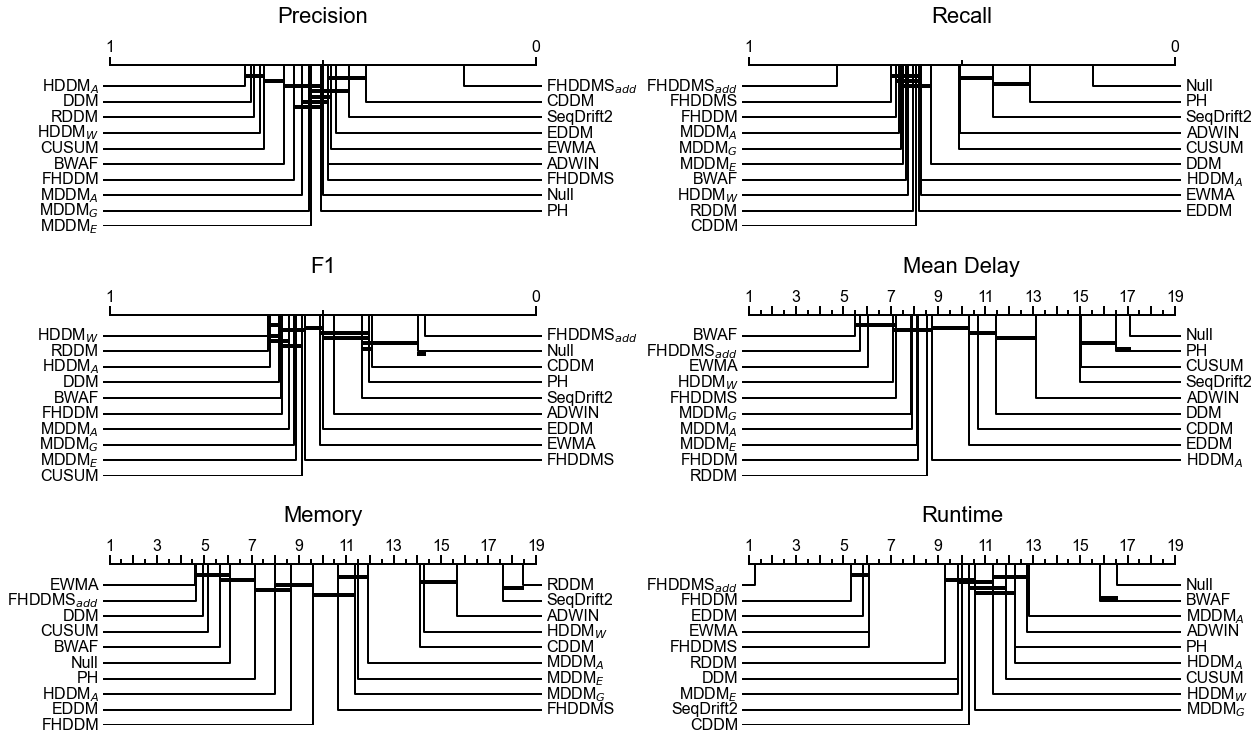

In [26]:
latex = process_results(
    results.drop( columns=['Model', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}.tex',
    fig_path=f'figures/{category}.pdf',
    bold_best=True,
    alpha=0.05
)

In [7]:
print(process_results(
    results[ results['Detector'].isin(['BDDM', 'BWAF', 'CDDM']) ]
        .drop( columns=['Model'] ), 
    groupby=['Detector', 'Mode'], 
    latex_path=f'tables/{category}_modes.tex',
#     fig_path='figures/benchmarks_modes.pdf',
    cd_diagram=False,
    bold_best=False
))

Writing LaTeX table to tables/benchmark_modes.tex
\begin{tabular}{lrrrrrrr}
\toprule
     &                &    Precision &       Recall &           F1 &       Mean Delay &           Memory (bytes) &          Runtime (ms) \\
Detector & Mode &              &              &              &                  &                  &                  \\
\midrule
BWAF & Abrupt Drift &  0.65 (0.17) &  0.72 (0.20) &  0.67 (0.18) &    54.62 (83.65) &   68.29 (140.58) &    79.75 (88.30) \\
     & Gradual Drift &  0.62 (0.16) &  0.69 (0.20) &  0.64 (0.17) &   122.58 (57.23) &    46.10 (43.07) &    77.11 (84.20) \\
     & High Noise &  0.47 (0.16) &  0.45 (0.21) &  0.44 (0.17) &   182.14 (63.33) &    42.10 (42.11) &  117.80 (124.63) \\
     & Long Concepts &  0.55 (0.17) &  0.70 (0.20) &  0.61 (0.18) &    72.20 (74.96) &    58.40 (66.98) &  138.52 (161.89) \\
     & Low Noise &  0.67 (0.17) &  0.71 (0.21) &  0.68 (0.19) &    61.26 (79.64) &    58.61 (70.37) &    78.43 (84.09) \\
     & Short Concepts &